In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
gender_data=pd.read_csv('/content/Transformed Data Set - Sheet1 (1).csv')
gender_data.head()#to show the first 5 rows

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [3]:
gender_data.tail()#to show the last 5 rows


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M
65,Cool,Electronic,Beer,Coca Cola/Pepsi,M


In [4]:
gender_data.describe()


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [5]:
gender_data.columns#to show all columns


Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [6]:
gender_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [7]:
gender_data.shape#show all data rows and columns


(66, 5)

In [8]:
gender_data.Gender.value_counts()


F    33
M    33
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

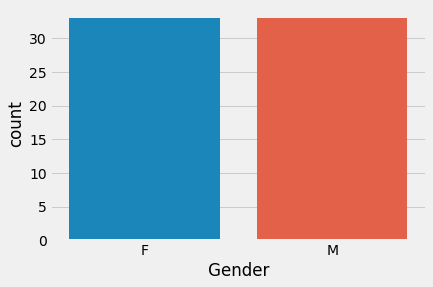

In [9]:
sns.countplot(x='Gender',data=gender_data)


In [10]:
gender_data['Favorite Color'].unique()#all Favorite Colors


array(['Cool', 'Neutral', 'Warm'], dtype=object)

In [11]:
gender_data['Favorite Color'].value_counts()


Cool       37
Warm       22
Neutral     7
Name: Favorite Color, dtype: int64

<AxesSubplot:>

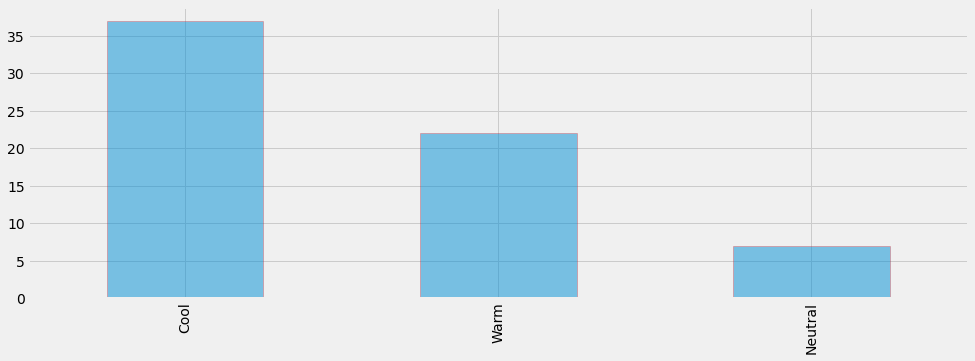

In [12]:
plt.figure(figsize=(15,5))
gender_data['Favorite Color'].value_counts().plot.bar(edgecolor='red',alpha=0.5)

In [13]:
fav_color=pd.DataFrame(gender_data.groupby('Gender')['Favorite Color'].value_counts())
fav_color.rename(columns={'Favorite Color':'Favorite Color_counts'},inplace=True)
fav_color.T

Gender                   F                 M             
Favorite Color        Cool Warm Neutral Cool Warm Neutral
Favorite Color_counts   17   13       3   20    9       4

<AxesSubplot:xlabel='Gender', ylabel='count'>

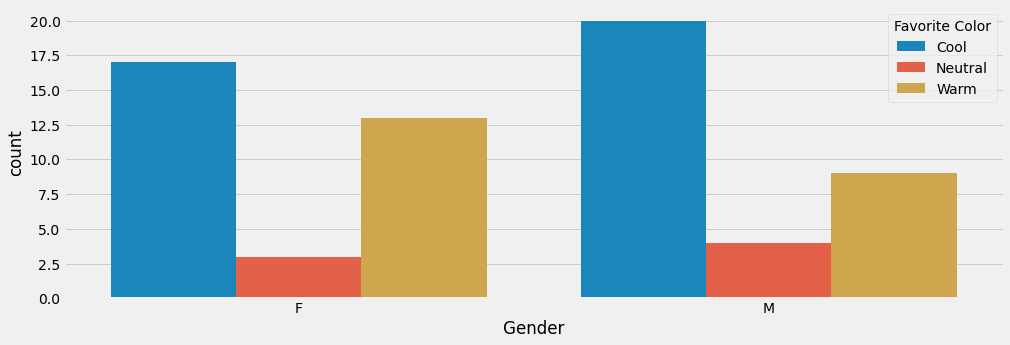

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x='Gender',data=gender_data,hue='Favorite Color')

In [15]:
from sklearn.preprocessing import LabelEncoder
gender_data.head(2)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F


In [16]:
gender_data['Favorite Music Genre'].unique()


array(['Rock', 'Hip hop', 'Folk/Traditional', 'Jazz/Blues', 'Pop',
       'Electronic', 'R&B and soul'], dtype=object)

In [17]:
fav_music=gender_data.copy()
L_encoder=LabelEncoder()
fav_music['Favorite Music Genre']=L_encoder.fit_transform(fav_music['Favorite Music Genre'])
fav_music.head(2)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,6,Vodka,7UP/Sprite,F
1,Neutral,2,Vodka,Coca Cola/Pepsi,F


In [18]:
fav_music['Favorite Music Genre'].unique()


array([6, 2, 1, 3, 4, 0, 5])

In [19]:
pd.DataFrame(gender_data.groupby('Gender')['Favorite Music Genre'].value_counts())

Favorite Music Genre
Gender Favorite Music Genre                      
F      Pop                                     13
       Rock                                    10
       Jazz/Blues                               3
       Electronic                               2
       Folk/Traditional                         2
       R&B and soul                             2
       Hip hop                                  1
M      Rock                                     9
       Hip hop                                  7
       Electronic                               6
       Pop                                      4
       R&B and soul                             4
       Folk/Traditional                         2
       Jazz/Blues                               1

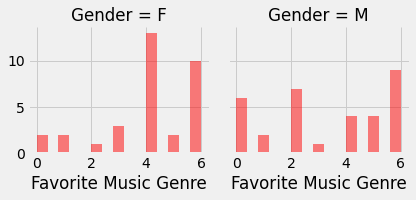

In [20]:
music_draw=sns.FacetGrid(data=fav_music,col="Gender")
music_draw.map(plt.hist,"Favorite Music Genre",bins=15,color="red",alpha=0.5)

In [21]:
gender_data['Favorite Beverage'].value_counts()


Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: Favorite Beverage, dtype: int64

<AxesSubplot:ylabel='Favorite Beverage'>

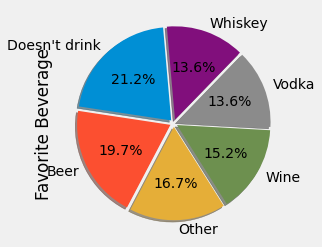

In [22]:
gender_data['Favorite Beverage'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.04,0.04,0.04,0.04,0.04,0.04],shadow=True,startangle = 95)

In [23]:
gender_data.head(2)


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F


In [24]:
gender_data.groupby('Gender')['Favorite Soft Drink'].value_counts()


Gender  Favorite Soft Drink
F       Coca Cola/Pepsi        17
        7UP/Sprite              8
        Fanta                   6
        Other                   2
M       Coca Cola/Pepsi        15
        Fanta                   8
        7UP/Sprite              5
        Other                   5
Name: Favorite Soft Drink, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

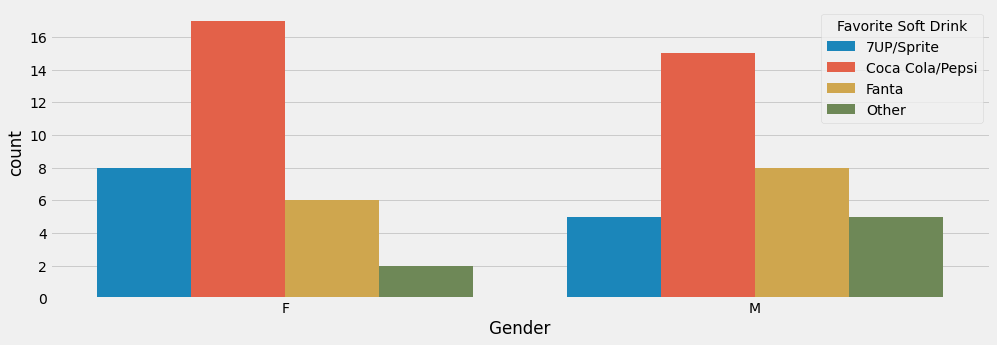

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(data=gender_data,x='Gender',hue='Favorite Soft Drink')

In [26]:
gender_data.isnull().sum()


Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
cols=list(gender_data.columns)
for col in cols:
    gender_data[col]=L_encoder.fit_transform(gender_data[col])
gender_data   

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


<AxesSubplot:>

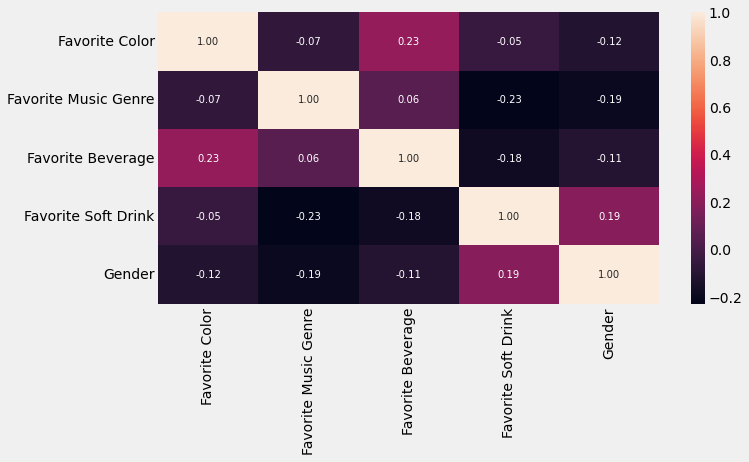

In [29]:
col_correlation = gender_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(col_correlation,annot=True,fmt='.2f',annot_kws={'size': 10})

In [30]:
X=gender_data.drop('Gender',axis=1)
Y=gender_data['Gender']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=10,shuffle=True)

In [32]:
print('x train shape :',x_train.shape)
print('y train shape :',y_train.shape)
print('x test shape :',x_test.shape)
print('y test shape :',y_test.shape)

x train shape : (49, 4)
y train shape : (49,)
x test shape : (17, 4)
y test shape : (17,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
KN_model=KNeighborsClassifier(n_neighbors=4)
KN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [34]:
KN_predicting=KN_model.predict(x_test)


In [35]:
print("y true :",y_test[:10].values)
print("y predict :",KN_predicting[:10])

y true : [0 0 1 0 0 1 0 0 1 0]
y predict : [0 0 1 0 0 0 0 0 1 0]


<AxesSubplot:>

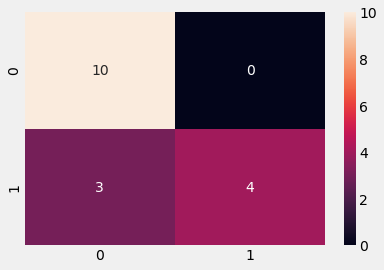

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,KN_predicting)
sns.heatmap(cm,annot=True)

In [37]:
print(classification_report(y_test,KN_predicting))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.57      0.73         7

    accuracy                           0.82        17
   macro avg       0.88      0.79      0.80        17
weighted avg       0.86      0.82      0.81        17

